In [12]:
import sys
print(sys.executable)
print(sys.version)


c:\Users\mahta\OneDrive - Georgia Institute of Technology\Documents\GitHub\Bank\SDS-CP038-banktermpredict\.venv\Scripts\python.exe
3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]


**BankTermPredict Project :
** This dataset collected by a Portugese banking instutition and the goal is that to predict whether a client will subscribe to a term deposit or not
Purpose : this is a supervised learning project and the goal is to predict if the client will subscribe (yes/no) to term deposit (variable ).

Data Dictionary


Part 1 - Data Preprocessing 
Importing the dataset 

Import all alibreries that are needed in this project 

In [13]:
# Import All Libraries Used in this Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    confusion_matrix, 
    classification_report
)
import joblib, json
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import iqr
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [14]:
dataset_path = Path("data") / "bank-full.csv"

if not dataset_path.exists():
    raise FileNotFoundError(f"{dataset_path} not found. Check the file name and folder.")

df = pd.read_csv(dataset_path, sep=";")
df.head(30)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [15]:
# Number of rows and colums thorough shape 
print("Shape of the dataset: ")
df.shape

Shape of the dataset: 


(45211, 17)

In [16]:
print ('Info of the dataset: ')
df.info()

Info of the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB



##### Manage missing value, duplicates


In [17]:
# 1.verify NA/Nan value 
missing_value = df.isnull().sum()
print("Missing values in each column: ")
print(missing_value)

Missing values in each column: 
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [18]:
#2. Verify unstructured missing values (e.g., '?', 'NA', 'NaN',empty strings, placeholders)
print("Unstructured missing values in each column: ")
for col in df.columns:
    print(f"{col}: {df[col].isin(["", "NA", "N/A", "null", "NULL", "na", "n/a", "Null", "None", "none"]).sum()}")

Unstructured missing values in each column: 
age: 0
job: 0
marital: 0
education: 0
default: 0
balance: 0
housing: 0
loan: 0
contact: 0
day: 0
month: 0
duration: 0
campaign: 0
pdays: 0
previous: 0
poutcome: 0
y: 0


In [19]:
#3 verify duplicates rows
duplicated_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicated_rows}")

if duplicated_rows > 0:
    df = df.drop_duplicates()
    print("Duplicate rows have been removed.")

Number of duplicate rows: 0


In [20]:
#4  check for sentinel-coded text placeholders
placeholders = {"unknown", "?", "na", "n/a", "none", "null", "-"}
for col in df.columns:
    if df[col].isin(placeholders).any():
        print(f"Sentinel-coded text placeholders found in column '{col}': {df[col].isin(placeholders).sum()}")

Sentinel-coded text placeholders found in column 'job': 288
Sentinel-coded text placeholders found in column 'education': 1857
Sentinel-coded text placeholders found in column 'contact': 13020
Sentinel-coded text placeholders found in column 'poutcome': 36959


##### EDA : feature distributions 

Histograms: Numeric Features

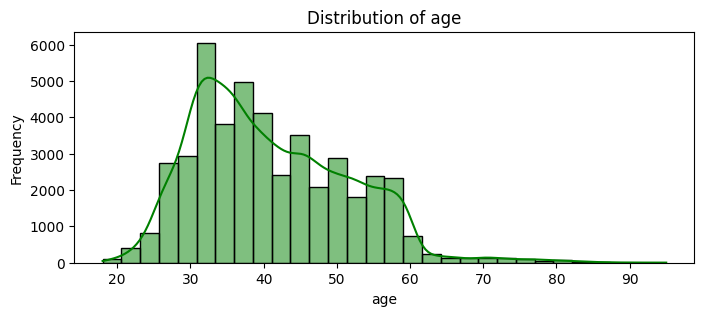

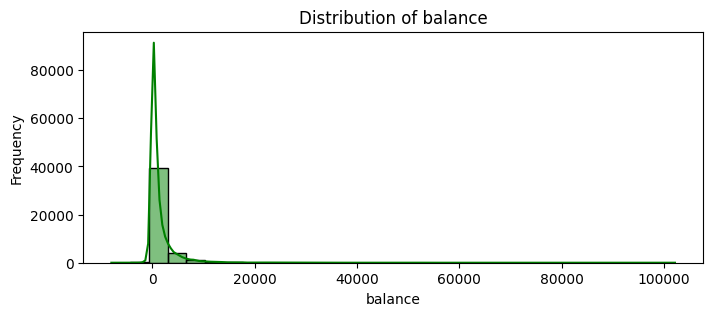

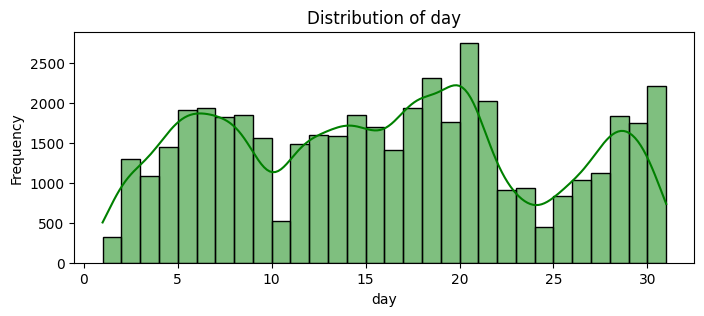

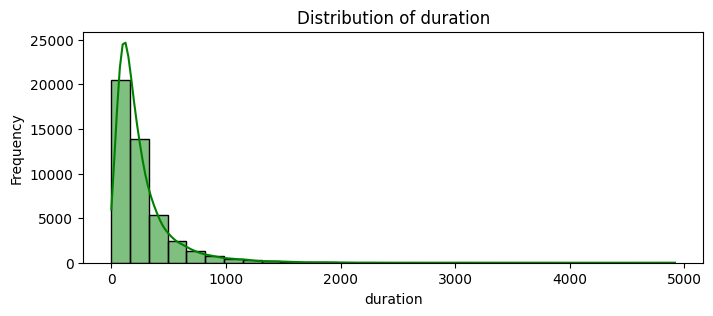

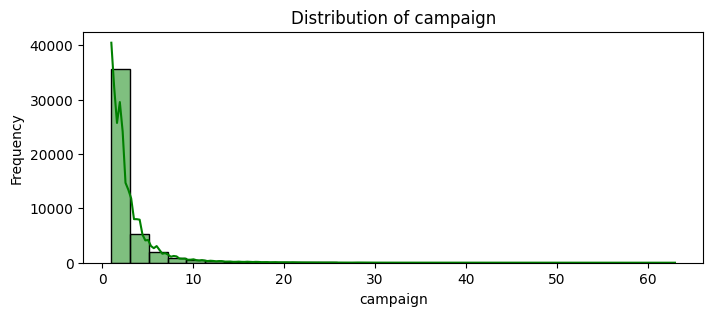

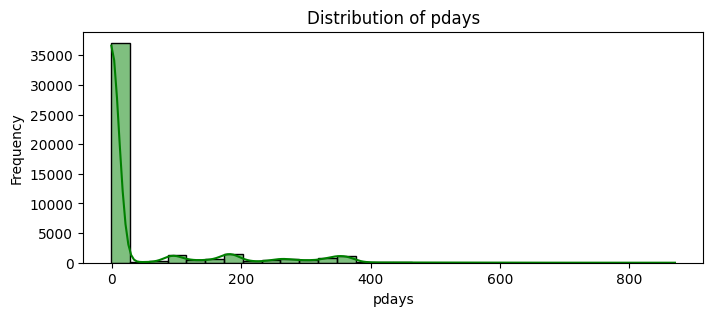

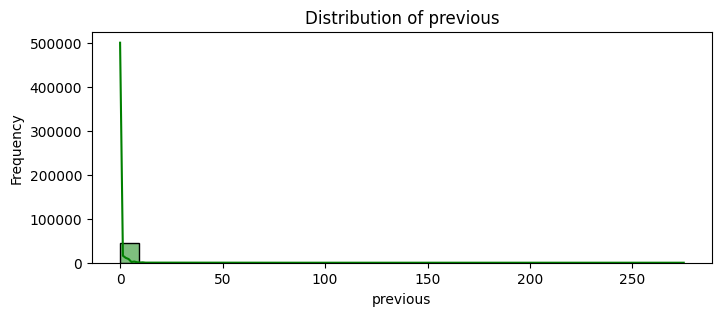

In [39]:
num_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
for col in num_cols:
    plt.figure(figsize=(8, 3))
    sns.histplot(df[col].dropna(),bins=30, kde=True, color='green') 
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show() 


##### Interpretation of histograms:
- age:
  - customers range in age from 18 to 95 years, with a mean age of approximately 41 years
  - It can be seen that age is righ-skewed,centered in the 30s-40s, with fewer older customers(60+), which creates the long right tail

- balance:(average yearly balance in Eur)
  - Highly right- skewed, with most clients near zero and a long positive tail. 
  - This data also includes negative balances, which likey showa customers who are overdrawn in debt

- campaign( number of cantacts in this campaign):
  - Right-skewed , most clients were contavted only 1-3 times,and the frequency drops quickly as the number of contacts increases.
  - It would be useful for feature engineering grouping high vs. low contact counts

- duration:(last contact duration, in seconds):
  - highly right-skewed, most calls are short, and a small number are very long.
  - There are clear outliers (very long calls). These are rare but stretch the scale.




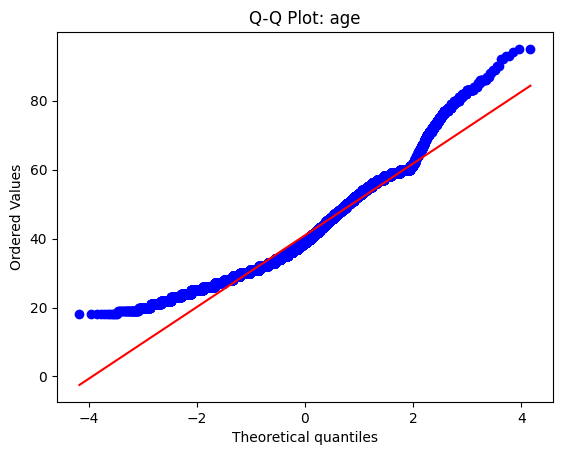

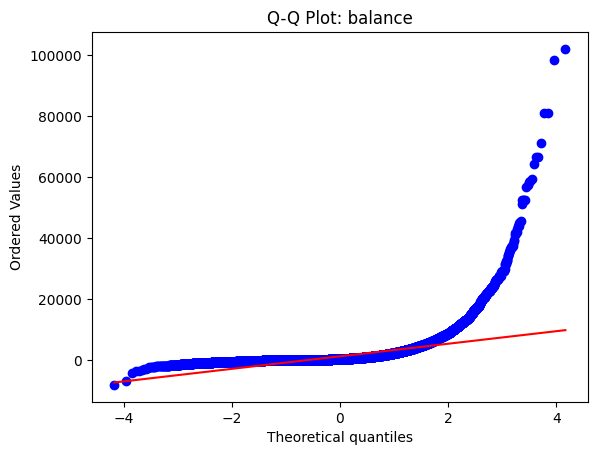

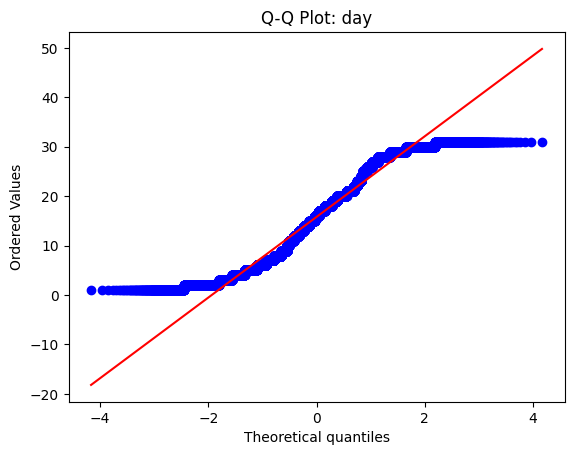

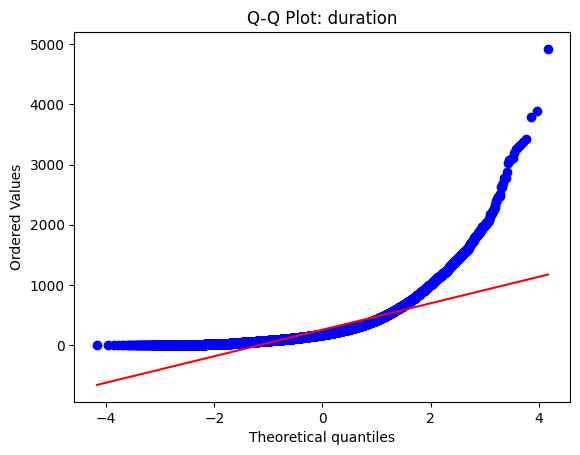

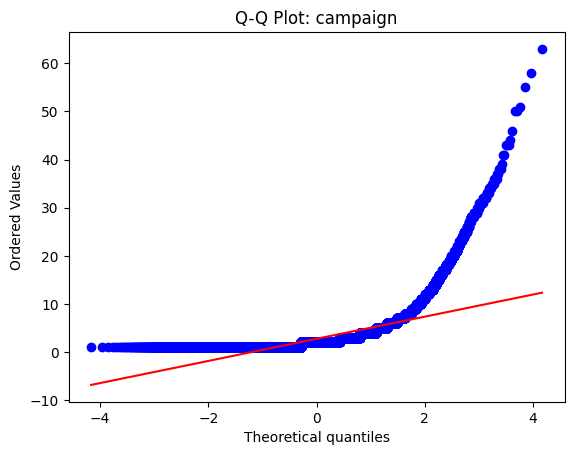

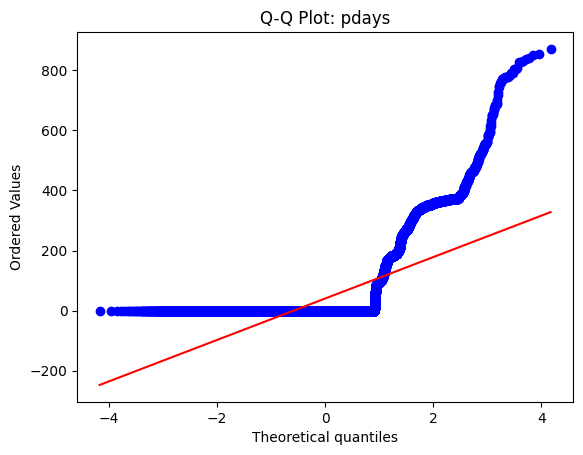

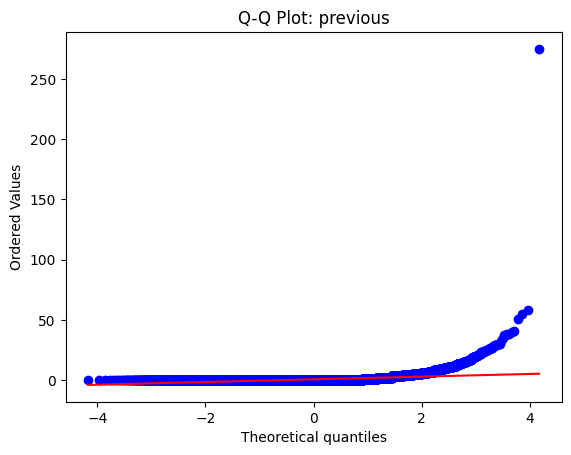

In [41]:
from scipy import stats
for col in num_cols:
    x = df[col].dropna()
    plt.figure()
    stats.probplot(x, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {col}")
    plt.show()